<a href="https://colab.research.google.com/github/KishoreAnalyticsLab/StreamingApp-Data-Unveiled/blob/main/Netflix_Business_case_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Netflix_dataset/Netflix.csv')
df.info()

#Original Datatype and number of non-null counts for each columns can be observed
#Shape and dimension can also be identified
print(f'\n\n Shape and dimension of the given dataframe are: \n Shape: {df.shape}\n Dimension: {df.ndim}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


 Shape and dimension of the given dataframe are: 
 Shape: (8807, 12)
 Dimension: 2


In [4]:
#Null values are found in the most of the columns
df[df.isnull().any(axis=1)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8796,s8797,TV Show,Yunus Emre,NaN,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,"January 17, 2017",2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [5]:
#In the country column, comma exists at the first
df[df['show_id']== 's366']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
365,s366,Movie,Eyes of a Thief,Najwa Najjar,"Khaled Abol El Naga, Souad Massi, Suhail Hadda...",", France, Algeria","July 30, 2021",2014,TV-14,103 min,"Dramas, Independent Movies, International Movies","After a decade in prison, a Palestinian man wi..."


In [6]:
#for few movies, 'date_added' field is also missing.
df[df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [7]:
df
#Observations & Challenges: (Before Explode and Merge)

#1: We can observe that single show_id has multiple casts(comma seperated) in the single row. Similar issue is observed in listed_in, country, director columns
#2: Data have null values
#3: For few movies, rating column holding the duration data
#4: String datatype is used in the 'duration' column
#5: Leading 'comma' presents in the country column

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
## Starting to unnest all the columns one by one

## Title and director 1/4
title_director_df = df[['title', 'director']]

title_director_df.loc[:,'director'] = title_director_df['director'].str.strip() #to eliminate leading and trailing spaces

title_director_df.loc[:,'director'] = title_director_df.director.str.split(', ').tolist() #converting strint as a list

title_director_df = title_director_df.explode(['director']) #Exploding the director column

title_director_df.head()

,title,director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,NaN
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,NaN
4,Kota Factory,NaN


In [9]:
## Title and cast  2/4
title_cast_df = df[['title', 'cast']]

title_cast_df.loc[:,'cast'] = title_cast_df['cast'].str.strip() #to eliminate leading and trailing spaces


title_cast_df.loc[:,'cast'] = title_cast_df.cast.str.split(', ').tolist() #converting strint as a list

title_cast_df = title_cast_df.explode(['cast'])  #Exploding the director column

title_cast_df.head()

,title,cast
0,Dick Johnson Is Dead,NaN
1,Blood & Water,Ama Qamata
1,Blood & Water,Khosi Ngema
1,Blood & Water,Gail Mabalane
1,Blood & Water,Thabang Molaba


In [10]:
## Title and country  3/4
title_country_df = df[['title', 'country']]

title_country_df.loc[:,'country'] = title_country_df['country'].str.strip() #to eliminate leading and trailing spaces


title_country_df.loc[:,'country'] = title_country_df.country.str.split(', ').tolist()  #converting strint as a list

title_country_df = title_country_df.explode(['country'])  #Exploding the director column

title_country_df.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,NaN
3,Jailbirds New Orleans,NaN
4,Kota Factory,India


In [11]:
## Title and listed_in  4/4
title_list_df = df[['title', 'listed_in']]

title_list_df.loc[:,'listed_in'] = title_list_df['listed_in'].str.strip() #to eliminate leading and trailing spaces

title_list_df.loc[:,'listed_in'] = title_list_df.listed_in.str.split(',').tolist()   #converting strint as a list

title_list_df = title_list_df.explode(['listed_in'])  #Exploding the director column

title_list_df.head()

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
1,Blood & Water,TV Dramas
1,Blood & Water,TV Mysteries
2,Ganglands,Crime TV Shows


In [12]:
## Merging DIRECTOR, CAST, COUNTRY, LISTED_IN df

new_df = title_director_df.merge(title_cast_df, on = 'title', how = 'outer').merge(title_country_df, on = 'title', how = 'outer').merge(title_list_df, on = 'title', how = 'outer')
new_df

,title,director,cast,country,listed_in
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,Documentaries
1,Blood & Water,NaN,Ama Qamata,South Africa,International TV Shows
2,Blood & Water,NaN,Ama Qamata,South Africa,TV Dramas
3,Blood & Water,NaN,Ama Qamata,South Africa,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...
201986,Zubaan,Mozez Singh,Anita Shabdish,India,International Movies
201987,Zubaan,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [13]:
##FULL MERGER - Merging the new dataframes(unnested df) to the old dataframes.

df_clean = df.merge(new_df, on = 'title', how = 'inner')

df_clean.head(100)

,show_id,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,listed_in_x,description,director_y,cast_y,country_y,listed_in_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,Ranjan Raj,India,TV Comedies
96,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,Alam Khan,India,International TV Shows
97,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,Alam Khan,India,Romantic TV Shows
98,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,Alam Khan,India,TV Comedies


In [14]:
#Dropping the old director, cast, country, listed_in

df_clean.drop(columns = ['director_x', 'cast_x', 'country_x', 'listed_in_x'], inplace = True)

In [15]:
#Renaming the new columns from merged dataframes

df_clean.rename(columns = {'director_y': 'director',
                           'cast_y': 'cast',
                           'country_y': 'country',
                           'listed_in_y': 'listed_in'}, inplace = True)

In [16]:
#Data is clean and there is no repetition , checked with below code

#df_clean[df_clean.show_id == 's201'], As of now, repetition is not observed in any columns


df_clean

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in
0,s1,Movie,Dick Johnson Is Dead,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm...",Kirsten Johnson,NaN,United States,Documentaries
1,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,International TV Shows
2,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Dramas
3,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Ama Qamata,South Africa,TV Mysteries
4,s2,TV Show,Blood & Water,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t...",NaN,Khosi Ngema,South Africa,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,International Movies
201987,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,Music & Musicals
201988,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,Dramas
201989,s8807,Movie,Zubaan,"March 2, 2019",2015,TV-14,111 min,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,International Movies


In [17]:
#Noticed three wrongly updated data in movie rating column
#Assuming they are all movie duration.
#Fixing this issue by update these values in duration and making this NA in rating column

df_clean.rating.value_counts()

,count
rating,
TV-MA,73867
TV-14,43931
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [18]:
#Creating masking for the above issue, duration data is in rating column

runtime_mask = df_clean['rating'].isin(['74 min', '84 min', '66 min'])

runtime_mask.value_counts()

,count
rating,
False,201988
True,3


In [19]:
df_clean.loc[runtime_mask, 'duration'] = df_clean.loc[runtime_mask, 'rating']
df_clean.loc[runtime_mask, 'rating'] = np.nan

In [20]:
df_clean.rating.value_counts()

,count
rating,
TV-MA,73867
TV-14,43931
R,25860
PG-13,16246
TV-PG,14926
PG,10919
TV-Y7,6304
TV-Y,3665
TV-G,2779


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   date_added    201833 non-null  object
 4   release_year  201991 non-null  int64 
 5   rating        201921 non-null  object
 6   duration      201991 non-null  object
 7   description   201991 non-null  object
 8   director      151348 non-null  object
 9   cast          199845 non-null  object
 10  country       190094 non-null  object
 11  listed_in     201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [22]:
#Observing a lot of NA values are there in the below columns. Hence replacing them with generic value.
#Handling the NA in the rating, country, director, cast column
na_rating_mask = df_clean['rating'].isin([np.nan])
na_country_mask = df_clean['country'].isna()
na_director_mask = df_clean['director'].isna()
na_cast_mask = df_clean['cast'].isna()


df_clean.loc[na_rating_mask, 'rating'] = "not_rated"
df_clean.loc[na_country_mask, 'country'] = "unknown_country"
df_clean.loc[na_director_mask, 'director'] = "unknown_director"
df_clean.loc[na_cast_mask, 'cast'] = "unknown_cast"


df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   show_id       201991 non-null  object
 1   type          201991 non-null  object
 2   title         201991 non-null  object
 3   date_added    201833 non-null  object
 4   release_year  201991 non-null  int64 
 5   rating        201991 non-null  object
 6   duration      201991 non-null  object
 7   description   201991 non-null  object
 8   director      201991 non-null  object
 9   cast          201991 non-null  object
 10  country       201991 non-null  object
 11  listed_in     201991 non-null  object
dtypes: int64(1), object(11)
memory usage: 18.5+ MB


In [23]:
###Cleaning duration column since it has duration as min and seasons

new_duration = df_clean.duration.str.split(' ', n = 1, expand = True)

#Changing the duration type as INTEGER.
df_clean['duration'] = new_duration[0].astype(int)

new_duration

,0,1
0,90,min
1,2,Seasons
2,2,Seasons
3,2,Seasons
4,2,Seasons
...,...,...
201986,111,min
201987,111,min
201988,111,min
201989,111,min


In [24]:
#df_clean.groupby('title')['duration'].nunique().sort_values(ascending = False)
#df_clean.groupby('title')['date_added'].value_counts()
#df_clean[df_clean['title'] == '#Alive']

In [25]:
##Converting date_added column into date format. Further creting new columns just to extract month and years
#error_rows = df[df['date_added'].isna()] - to check the date_added column with NaN values, just in case need

df_clean['date_added'] = df_clean['date_added'].str.strip() #will take the leading and trailing space from the date string

df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors = 'coerce', format = "%B %d, %Y" )  #converts string into date format

df_clean['month'] = df_clean['date_added'].dt.month.fillna(0).astype(int) #Extracting out month ## Filled NA values with 0 temperorily in order to make the column integer

df_clean['year'] = df_clean['date_added'].dt.year.fillna(0).astype(int)  #Extracting out year

#Not Filling NA in date_added with median date or mode or mean since it might completely changes the data integrity and truthness


In [26]:
#Since we have unnested all the column with 'comma', we missed to notice that few countries have leading or trailing comma
#Which is causing to have empty string in the country column. Hence, Dropping the columns with empty countries that are in S194 & S366

##df_clean[df_clean['country'] == '']

empty_country_mask = df_clean[df_clean['country'] == '']

df_clean = df_clean.drop(index = empty_country_mask.index)
df_clean = df_clean.drop_duplicates() #Just making sure there is no other duplicate records exist in the data.

df_clean.reset_index()
df_clean.info()

#We have addressed all the issues and challenges which we were facing at the beginning
### DATA IS ALMOST CLEAN NOW

<class 'pandas.core.frame.DataFrame'>
Index: 201904 entries, 0 to 201990
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201904 non-null  object        
 1   type          201904 non-null  object        
 2   title         201904 non-null  object        
 3   date_added    201746 non-null  datetime64[ns]
 4   release_year  201904 non-null  int64         
 5   rating        201904 non-null  object        
 6   duration      201904 non-null  int64         
 7   description   201904 non-null  object        
 8   director      201904 non-null  object        
 9   cast          201904 non-null  object        
 10  country       201904 non-null  object        
 11  listed_in     201904 non-null  object        
 12  month         201904 non-null  int64         
 13  year          201904 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usage: 23.1+ MB


In [27]:
df_clean

,show_id,type,title,date_added,release_year,rating,duration,description,director,cast,country,listed_in,month,year
0,s1,Movie,Dick Johnson Is Dead,2021-09-25,2020,PG-13,90,"As her father nears the end of his life, filmm...",Kirsten Johnson,unknown_cast,United States,Documentaries,9,2021
1,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",unknown_director,Ama Qamata,South Africa,International TV Shows,9,2021
2,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",unknown_director,Ama Qamata,South Africa,TV Dramas,9,2021
3,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",unknown_director,Ama Qamata,South Africa,TV Mysteries,9,2021
4,s2,TV Show,Blood & Water,2021-09-24,2021,TV-MA,2,"After crossing paths at a party, a Cape Town t...",unknown_director,Khosi Ngema,South Africa,International TV Shows,9,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,International Movies,3,2019
201987,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Anita Shabdish,India,Music & Musicals,3,2019
201988,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,Dramas,3,2019
201989,s8807,Movie,Zubaan,2019-03-02,2015,TV-14,111,A scrappy but poor boy worms his way into a ty...,Mozez Singh,Chittaranjan Tripathy,India,International Movies,3,2019


In [28]:
##########  ANALYSIS STARTTTSSSS #########

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#Counts of each categorical variable

df_rating = df_clean.groupby('rating')['title'].nunique().sort_values(ascending= False).reset_index()

print(f'Total Movies & TV Shows Combined: {df_clean.title.nunique()}\n')
print(f'Total Directors directed: {df_clean.director.nunique()}\n')
print(f'Total Unique No. of Countries: {df_clean.country.nunique()}\n')
print(f'Total Unique Genres: {df_clean.listed_in.nunique()}\n')
print(f'Rating - Unique Counts:\n {df_rating}\n')

Total Movies & TV Shows Combined: 8807

Total Directors directed: 4994

Total Unique No. of Countries: 127

Total Unique Genres: 73

Rating - Unique Counts:
        rating  title
0       TV-MA   3207
1       TV-14   2160
2       TV-PG    863
3           R    799
4       PG-13    490
5       TV-Y7    334
6        TV-Y    307
7          PG    287
8        TV-G    220
9          NR     80
10          G     41
11  not_rated      7
12   TV-Y7-FV      6
13      NC-17      3
14         UR      3



In [31]:
df_listed_in = df_clean.groupby('listed_in')['show_id'].nunique().sort_values(ascending= False).reset_index()
df_listed_in

,listed_in,show_id
0,International Movies,2624
1,Dramas,1600
2,Comedies,1210
3,Action & Adventure,859
4,Documentaries,829
...,...,...
68,Romantic Movies,3
69,Spanish-Language TV Shows,2
70,TV Sci-Fi & Fantasy,1
71,LGBTQ Movies,1


In [32]:
df_country = df_clean.groupby('country')['show_id'].nunique().sort_values(ascending= False).reset_index()
df_country

,country,show_id
0,United States,3689
1,India,1046
2,unknown_country,831
3,United Kingdom,804
4,Canada,445
...,...,...
122,Cuba,1
123,Puerto Rico,1
124,Cameroon,1
125,Samoa,1


In [33]:
## No of MOVIES and TV Show added to Netflix in each year
## In the year column, replaced the NA values with '0'

no_of_shows = df_clean.groupby(['year'])['title'].nunique().reset_index()
print(f'No of Movies & TVhows added each year\n \n {no_of_shows}\n \n')

No of Movies & TVhows added each year
 
     year  title
0      0     10
1   2008      2
2   2009      2
3   2010      1
4   2011     13
5   2012      3
6   2013     11
7   2014     24
8   2015     82
9   2016    429
10  2017   1188
11  2018   1649
12  2019   2016
13  2020   1879
14  2021   1498
 



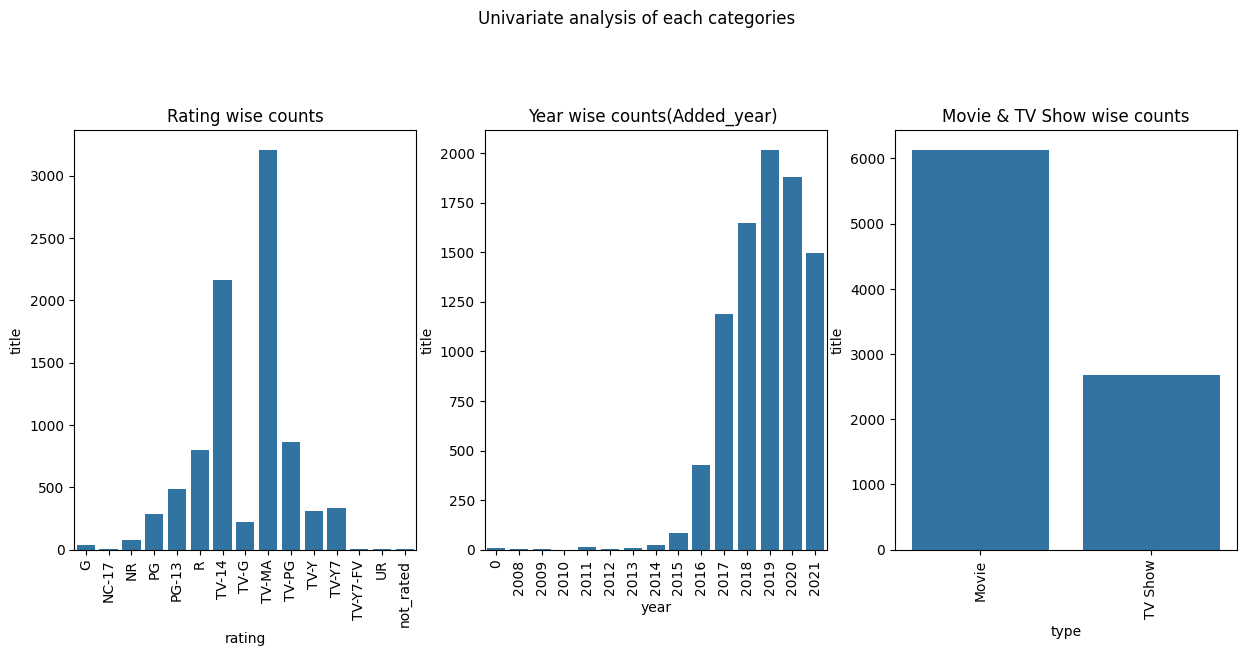

In [34]:
#Analysis on univariate categories
df_rating = df_clean.groupby('rating')['title'].nunique().reset_index()
df_type = df_clean.groupby('type')['title'].nunique().reset_index()
df_added_year = df_clean.groupby('year')['title'].nunique().reset_index()
#Since we have large number of countries and genres, so wont be working in bar chat

fig = plt.figure(figsize = (15, 12)).suptitle('Univariate analysis of each categories')
#plot1
plt.subplot(2, 3, 1)
sns.barplot(data = df_rating, x = "rating", y = "title")
plt.title("Rating wise counts")
plt.xticks(rotation = 90, fontsize = 10)

#Bar plot for the above data, In the year column, replaced the NA values with '0'
plt.subplot(2, 3, 2)
sns.barplot(data = df_added_year, x = "year", y = "title")
plt.title("Year wise counts(Added_year) ")
plt.xticks(rotation = 90, fontsize = 10)

plt.subplot(2, 3, 3)
sns.barplot(data = df_type, x = "type", y = "title")
plt.title("Movie & TV Show wise counts")
plt.xticks(rotation = 90, fontsize = 10)


plt.show()

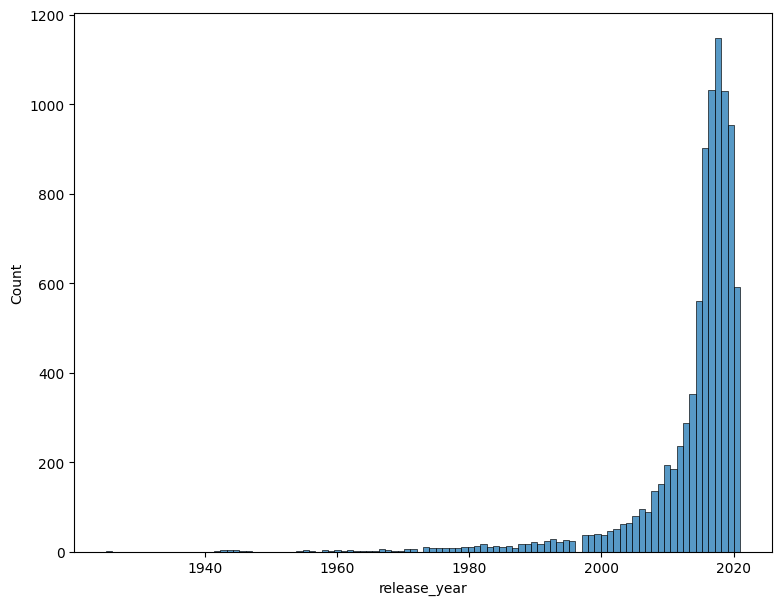

In [52]:
#Histoplot to analyse how many movies & shows released over the times - Release year wise
plt.figure(figsize = (9,7))
sns.histplot(df['release_year'], bins = 100)
plt.show()

In [53]:
##Number of movies produced in each country and the top 10 countries among them.

grouped_movies = df_clean[df_clean.type == 'Movie']

Top_10_Countries_mov = grouped_movies.groupby('country')['title'].nunique().sort_values(ascending = False).reset_index().head(10)
Bottom_10_Countries_mov = grouped_movies.groupby('country')['title'].nunique().sort_values().reset_index().head(10)

total_movies = grouped_movies['title'].nunique(sum)

print(f'Total movies produced across countries - {total_movies}\n')
print(f'Top 10 countries with most no of movies produced - \n {Top_10_Countries_mov}\n')
print(f'Bottom 10 countries with least no of movies produced - \n {Bottom_10_Countries_mov}')

Total movies produced across countries - 6131

Top 10 countries with most no of movies produced - 
            country  title
0    United States   2751
1            India    962
2   United Kingdom    532
3  unknown_country    440
4           Canada    319
5           France    303
6          Germany    182
7            Spain    171
8            Japan    119
9            China    114

Bottom 10 countries with least no of movies produced - 
          country  title
0    Afghanistan      1
1       Ethiopia      1
2        Jamaica      1
3     Kazakhstan      1
4         Latvia      1
5  Liechtenstein      1
6      Lithuania      1
7      Mauritius      1
8       Mongolia      1
9     Montenegro      1


In [54]:
##Number of TV Show produced in each country and the top 10 countries among them.

grouped_tv_show = df_clean[df_clean.type == 'TV Show']

Top_10_Countries_tv = grouped_tv_show.groupby('country')['title'].nunique().sort_values( ascending = False).reset_index().head(10)
Bottom_10_Countries_tv = grouped_tv_show.groupby('country')['title'].nunique().sort_values().reset_index().head(10)
total_tv_show = grouped_tv_show['title'].nunique(sum)

print(f'Total TV Shows produced across countries - {total_tv_show}\n')
print(f'Top 10 Countries With most no. of TV Shows produced - \n {Top_10_Countries_tv}\n')
print(f'Bottom 10 Countries With least no. of TV Shows produced - \n {Bottom_10_Countries_tv}')

Total TV Shows produced across countries - 2676

Top 10 Countries With most no. of TV Shows produced - 
            country  title
0    United States    938
1  unknown_country    391
2   United Kingdom    272
3            Japan    199
4      South Korea    170
5           Canada    126
6           France     90
7            India     84
8           Taiwan     70
9        Australia     66

Bottom 10 Countries With least no. of TV Shows produced - 
                 country  title
0               Hungary      1
1           Puerto Rico      1
2                Cyprus      1
3                  Cuba      1
4               Croatia      1
5           Switzerland      1
6                 Syria      1
7             Mauritius      1
8                 Malta      1
9  United Arab Emirates      1


In [55]:
## Analysis of DIRECTORS of different types of shows/movies.

director_wise_top = grouped_movies.groupby('director')['title'].nunique().sort_values(ascending = False).reset_index()
director_wise_bottom = grouped_movies.groupby('director')['title'].nunique().sort_values().reset_index()

print(f'The Top 10 director to direct the more no. of movies & TV Shows combined are \n {director_wise_top.head(10)}\n ')
print(f'The Bottom 10 director to direct the least no. of movies & TV Shows combined are \n {director_wise_bottom.head(10)}')


#Insights - Documentries have topped in this list.

#Recommendation : From above these inferences, Documentries have topped in all categories. And so, concentrating on the documentries will have more views and revenue

The Top 10 director to direct the more no. of movies & TV Shows combined are 
               director  title
0     unknown_director    188
1        Rajiv Chilaka     22
2            Jan Suter     21
3          Raúl Campos     19
4          Suhas Kadav     16
5         Marcus Raboy     15
6            Jay Karas     15
7  Cathy Garcia-Molina     13
8      Youssef Chahine     12
9      Martin Scorsese     12
 
The Bottom 10 director to direct the least no. of movies & TV Shows combined are 
           director  title
0    Jessie Nelson      1
1     Lluís Quílez      1
2     Logan Kibens      1
3    Lone Scherfig      1
4      Lonny Price      1
5     Lonzo Nzekwe      1
6     Lorena Munoz      1
7   Lorene Machado      1
8  Lorene Scafaria      1
9        Lori Kaye      1


In [56]:
## Analysis of ACTORS on different types of shows/movies.

actor_wise_top = grouped_movies.groupby('cast')['title'].nunique().sort_values(ascending = False).reset_index()
actor_wise_bottom = grouped_movies.groupby('cast')['title'].nunique().sort_values().reset_index()

print(f'The Top 10 actor to cast in the more no. of movies & TV Shows combined are \n {actor_wise_top.head(10)}\n ')
print(f'The Bottom 10 actor to cast in the least no. of movies & TV Shows combined are \n {actor_wise_bottom.head(10)}')

#Insights - Documentries have topped in this list.

#Recommendation : From above all inferences, Documentries have topped in all categories. And so, concentrating on the documentries will have more views and revenue

The Top 10 actor to cast in the more no. of movies & TV Shows combined are 
                cast  title
0      unknown_cast    475
1       Anupam Kher     42
2    Shah Rukh Khan     35
3  Naseeruddin Shah     32
4      Akshay Kumar     30
5           Om Puri     30
6  Amitabh Bachchan     28
7      Paresh Rawal     28
8     Julie Tejwani     28
9      Rupa Bhimani     27
 
The Bottom 10 actor to cast in the least no. of movies & TV Shows combined are 
                cast  title
0               Jr.      1
1   Maya Washington      1
2      Maya Tideman      1
3       Maya Stojan      1
4      Maya Simmons      1
5        Maya Sarao      1
6  Maya Krishna Rao      1
7        Maya Kazan      1
8        Maya Hawke      1
9      Maya Gilbert      1


In [57]:
#Creating the data for the country based analysis
top5_rating = df_clean.groupby(["rating"])['title'].nunique().sort_values(ascending = False).index[:5]
top5_country = df_clean.groupby(["country"])['title'].nunique().sort_values(ascending = False).index[:5]
top5_genres = df_clean.groupby(["listed_in"])['title'].nunique().sort_values(ascending = False).index[:5]
top5_directors = df_clean.groupby(["director"])['title'].nunique().sort_values(ascending = False).index[:5]
top5_casts = df_clean.groupby(["cast"])['title'].nunique().sort_values(ascending = False).index[:5]

top5_data = df_clean.loc[
    (df_clean["rating"].isin(top5_rating)) &
    (df_clean["country"].isin(top5_country)) &
    (df_clean["listed_in"].isin(top5_genres)) &
    (df_clean["director"].isin(top5_directors)) &
    (df_clean["cast"].isin(top5_casts))
    ]

print(top5_rating)
print(top5_country)
print(top5_genres)
print(top5_directors)
print(top5_casts)

Index(['TV-MA', 'TV-14', 'TV-PG', 'R', 'PG-13'], dtype='object', name='rating')
Index(['United States', 'India', 'unknown_country', 'United Kingdom',
       'Canada'],
      dtype='object', name='country')
Index([' International Movies', 'Dramas', 'Comedies', 'Action & Adventure',
       'Documentaries'],
      dtype='object', name='listed_in')
Index(['unknown_director', 'Rajiv Chilaka', 'Jan Suter', 'Raúl Campos',
       'Suhas Kadav'],
      dtype='object', name='director')
Index(['unknown_cast', 'Anupam Kher', 'Shah Rukh Khan', 'Julie Tejwani',
       'Naseeruddin Shah'],
      dtype='object', name='cast')


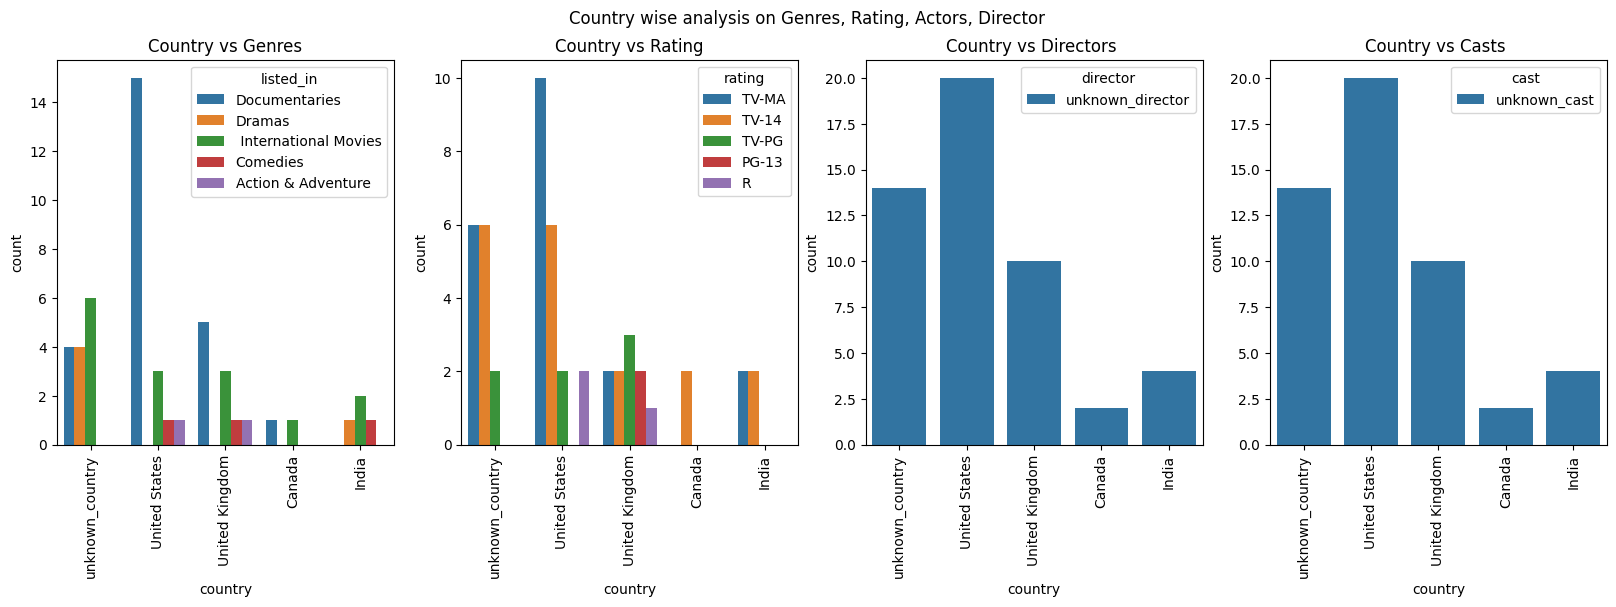

In [58]:
#Plotting for top5_data,
#Analysis on various factors based on the country

fig = plt.figure(figsize = (20,5)).suptitle('Country wise analysis on Genres, Rating, Actors, Director')

#Plot - Country vs Genre correlation
plt.subplot(1, 4, 1)
sns.countplot(data = top5_data, x = 'country', hue = 'listed_in')
plt.title("Country vs Genres")
plt.xticks(rotation = 90, fontsize = 10)

#Plot - Country vs Rating correlation
plt.subplot(1, 4, 2)
sns.countplot(data = top5_data, x = 'country', hue = 'rating')
plt.title("Country vs Rating")
plt.xticks(rotation = 90, fontsize = 10)

#Plot - Country vs Directors correlation
plt.subplot(1, 4, 3)
sns.countplot(data = top5_data, x = 'country', hue = 'director')
plt.title("Country vs Directors ")
plt.xticks(rotation = 90, fontsize = 10)

#Plot - Country vs Casts correlation
plt.subplot(1, 4, 4)
sns.countplot(data = top5_data, x = 'country', hue = 'cast')
plt.title("Country vs Casts ")
plt.xticks(rotation = 90, fontsize = 10)

plt.show()

In [59]:
#Observation for the above plotting


#1: It observed that Documentaries and International Movies was very popular among top 5 countries
#2: It it observed that TV-MA have topped all other rating categories
#3: With the given data, most of the documenteries does not have casts and directors. Now it is clear that documentries have been popular among other categories and genres

#Recommendations:

#Recommended to produce more documentries in different genres since it is trending and popular already

In [60]:
## What is the best time to launch a Movies?

grouped_movies = df_clean[df_clean.type == 'Movie']

movies_month_wise = grouped_movies.groupby('month')['title'].nunique().sort_values(ascending = False)

best_movie_month = movies_month_wise.index[0]
worst_movie_month = movies_month_wise.sort_values().index[0]

print(f'The best favourable month to release movie is {best_movie_month}th month of the year \n')
print(f'The least favourable month to release movie is {worst_movie_month}th month of the year \n')
print(f'The Top 5 month to release movie are: \n {movies_month_wise.reset_index().head(5)}')

#Insights - Second half of the year have most of the shows released

The best favourable month to release movie is 7th month of the year 

The least favourable month to release movie is 2th month of the year 

The Top 5 month to release movie are: 
    month  title
0      7    565
1      4    550
2     12    547
3      1    546
4     10    545


In [61]:
## What is the best time to launch a TV Show?

grouped_tv_show = df_clean[df_clean.type == 'TV Show']

tvshow_month_wise = grouped_tv_show.groupby('month')['title'].nunique().sort_values(ascending = False)

best_tvshow_month = tvshow_month_wise.index[0]
worst_tvshow_month = tvshow_month_wise.sort_values().index[1]


print(f'The best favourable month to release TV Show is {best_tvshow_month}th month of the year \n')
print(f'The least favourable month to release TV Show is {worst_tvshow_month}th month of the year \n')
print(f'The Top 5 favourable month to release TV Show are: \n {tvshow_month_wise.reset_index().head(5)}')

#Insights - Similar to Movies, In TV Shows have been released on the second half of the year
#Recommendation : To concentrate releasing on the first half of the year since  less no. of shows produced during those months

The best favourable month to release TV Show is 12th month of the year 

The least favourable month to release TV Show is 2th month of the year 

The Top 5 favourable month to release TV Show are: 
    month  title
0     12    266
1      7    262
2      9    251
3      6    236
4      8    236


(-0.5, 1599.5, 799.5, -0.5)

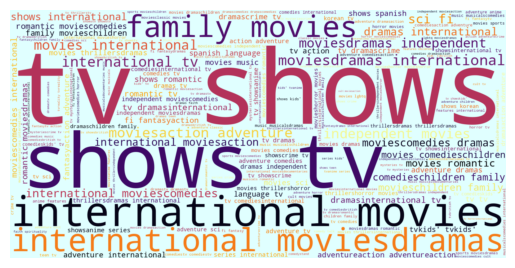

In [62]:
## Word cloud on the genre of movies

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt
import wordcloud

#wc = WordCloud().generate(word_string) >> Format to generate word cloud

word_string = ''.join(df_clean['listed_in'].str.lower())

wc = WordCloud(background_color="lightcyan", stopwords = STOPWORDS, max_words=200, max_font_size= 1000,  width=1600, height=800)

wc.generate(word_string)

plt.imshow(wc.recolor( colormap= 'inferno_r' , random_state=17), interpolation="bilinear")
plt.axis('off')

In [63]:
#How many years will it take to be added to Netflix after the release of the movie

#Exception:
#1 - date_added might have not update in the data set, it reflects as NaT -
#Solution : Filling the NA appears in 'days_to_add' column with the mean() number of years.

#2 - for some data release year is earlier than added date, it might result in negative years
#Solution : Excluding that from the analysis since it is added before the release year. Marking it as '-1'

#3 -
df_release = df

df_release['date_added'] = pd.to_datetime(df_release['date_added'], errors = 'coerce', format = "%B %d, %Y" )  #Converting string to date type

df_release['days_to_add'] = (df_release['date_added'].dt.year - df_release['release_year'])  #Checking the difference between date_added and release_year

df_release['days_to_add'] = df_release['days_to_add'].fillna(round(df_release['days_to_add'].mean(),2))

df_release["days_to_add"] = df_release["days_to_add"].apply(lambda x: x if x >= 0 else -1) #Apply lambda function to handle exception

print(f'Average years taken for any movie/TVshow to be added to Netflix from release year: {round(df_release["days_to_add"].mean(),2)} years')

Average years taken for any movie/TVshow to be added to Netflix from release year: 4.69 years


In [64]:
year_group_by_duration = df_clean.groupby(df_clean["release_year"])["duration"]\
.agg(["count", "mean"]).apply(round)
year_group_by_duration.head()

,count,mean
release_year,,
1925,1,1.0
1942,6,29.0
1943,5,66.0
1944,24,70.0
1945,13,53.0


In [65]:

 x = year_group_by_duration[ :] ,
 y = year_group_by_duration[3:]["mean"],

y

(release_year
 1944     70.0
 1945     53.0
 1946     20.0
 1947     42.0
 1954    118.0
         ...  
 2017     76.0
 2018     73.0
 2019     56.0
 2020     51.0
 2021     48.0
 Name: mean, Length: 71, dtype: float64,)